# House Prices: Advanced Regression Techniques

## Description
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

## Acknowledgments
The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 

## Data set

Here's a brief version of what you'll find in the data description file.

* `SalePrice` - the property's sale price in dollars. This is the target variable * that you're trying to predict.
* `MSSubClass`: The building class
* `MSZoning`: The general zoning classification
* `LotFrontage`: Linear feet of street connected to property
* `LotArea`: Lot size in square feet
* `Street`: Type of road access
* `Alley`: Type of alley access
* `LotShape`: General shape of property
* `LandContour`: Flatness of the property
* `Utilities`: Type of utilities available
* `LotConfig`: Lot configuration
* `LandSlope`: Slope of property
* `Neighborhood`: Physical locations within Ames city limits
* `Condition1`: Proximity to main road or railroad
* `Condition2`: Proximity to main road or railroad (if a second is present)
* `BldgType`: Type of dwelling
* `HouseStyle`: Style of dwelling
* `OverallQual`: Overall material and finish quality
* `OverallCond`: Overall condition rating
* `YearBuilt`: Original construction date
* `YearRemodAdd`: Remodel date
* `RoofStyle`: Type of roof
* `RoofMatl`: Roof material
* `Exterior1st`: Exterior covering on house
* `Exterior2nd`: Exterior covering on house (if more than one material)
* `MasVnrType`: Masonry veneer type
* `MasVnrArea`: Masonry veneer area in square feet
* `ExterQual`: Exterior material quality
* `ExterCond`: Present condition of the material on the exterior
* `Foundation`: Type of foundation
* `BsmtQual`: Height of the basement
* `BsmtCond`: General condition of the basement
* `BsmtExposure`: Walkout or garden level basement walls
* `BsmtFinType1`: Quality of basement finished area
* `BsmtFinSF1`: Type 1 finished square feet
* `BsmtFinType2`: Quality of second finished area (if present)
* `BsmtFinSF2`: Type 2 finished square feet
* `BsmtUnfSF`: Unfinished square feet of basement area
* `TotalBsmtSF`: Total square feet of basement area
* `Heating`: Type of heating
* `HeatingQC`: Heating quality and condition
* `CentralAir`: Central air conditioning
* `Electrical`: Electrical system
* `1stFlrSF`: First Floor square feet
* `2ndFlrSF`: Second floor square feet
* `LowQualFinSF`: Low quality finished square feet (all floors)
* `GrLivArea`: Above grade (ground) living area square feet
* `BsmtFullBath`: Basement full bathrooms
* `BsmtHalfBath`: Basement half bathrooms
* `FullBath`: Full bathrooms above grade
* `HalfBath`: Half baths above grade
* `Bedroom`: Number of bedrooms above basement level
* `Kitchen`: Number of kitchens
* `KitchenQual`: Kitchen quality
* `TotRmsAbvGrd`: Total rooms above grade (does not include bathrooms)
* `Functional`: Home functionality rating
* `Fireplaces`: Number of fireplaces
* `FireplaceQu`: Fireplace quality
* `GarageType`: Garage location
* `GarageYrBlt`: Year garage was built
* `GarageFinish`: Interior finish of the garage
* `GarageCars`: Size of garage in car capacity
* `GarageArea`: Size of garage in square feet
* `GarageQual`: Garage quality
* `GarageCond`: Garage condition
* `PavedDrive`: Paved driveway
* `WoodDeckSF`: Wood deck area in square feet
* `OpenPorchSF`: Open porch area in square feet
* `EnclosedPorch`: Enclosed porch area in square feet
* `3SsnPorch`: Three season porch area in square feet
* `ScreenPorch`: Screen porch area in square feet
* `PoolArea`: Pool area in square feet
* `PoolQC`: Pool quality
* `Fence`: Fence quality
* `MiscFeature`: Miscellaneous feature not covered in other categories
* `MiscVal`: USD Value of miscellaneous feature
* `MoSold`: Month Sold
* `YrSold`: Year Sold
* `SaleType`: Type of sale
* `SaleCondition`: Condition of sale

## Goal
Predict sales prices and practice feature engineering, RFs, and gradient boosting
Type: supervised machine learning - regression

---

# Exploratory Analysis¶

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
# keep only relevant imports based on the regresssion or classification goals
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

In [4]:
# common classifiers
#from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
#from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC

In [5]:
import xgboost as xgb
import lightgbm as lgbm

In [6]:
# common regresssors
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, BayesianRidge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR

In [7]:
from sklearn.pipeline import Pipeline

In [8]:
# skip future warnings and display enough columns for wide data sets
import warnings
warnings.simplefilter(action='ignore') #, category=FutureWarning)
pd.set_option('display.max_columns', 100)

## Data set first insight

Let's see wath the data set looks like

In [9]:
df = pd.read_csv('../input/train.csv', index_col='Id' )
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Number of samples (lines) and features (colunms including the target)

In [10]:
df.shape

(1460, 80)

Basic infos

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

Number of columns for each type of data

In [12]:
df.dtypes.value_counts()

object     43
int64      34
float64     3
dtype: int64

Unique values for each type of data

In [13]:
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

Ratio of missing values by column

In [14]:
def missing_values_table(df):
        """Function to calculate missing values by column# Funct // credits Will Koehrsen"""
    
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Le jeu de données a " + str(df.shape[1]) + " colonnes.\n"      
            "Il y a " + str(mis_val_table_ren_columns.shape[0]) +
              " colonnes avec des valeurs manquantes.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [15]:
missing_values = missing_values_table(df)
missing_values.head(10)

Le jeu de données a 80 colonnes.
Il y a 19 colonnes avec des valeurs manquantes.


,Missing Values,% of Total Values
PoolQC,1453,99.5
MiscFeature,1406,96.3
Alley,1369,93.8
Fence,1179,80.8
FireplaceQu,690,47.3
LotFrontage,259,17.7
GarageType,81,5.5
GarageYrBlt,81,5.5
GarageFinish,81,5.5
GarageQual,81,5.5


In [16]:
cat_feat = list(df.select_dtypes('object').columns)
num_feat = list(df.select_dtypes(exclude='object').columns)

## Data Visualization

informations on the target

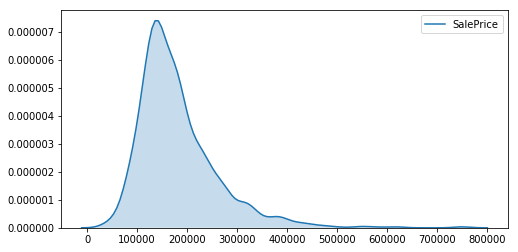

In [17]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df.SalePrice, shade=True)
plt.show()

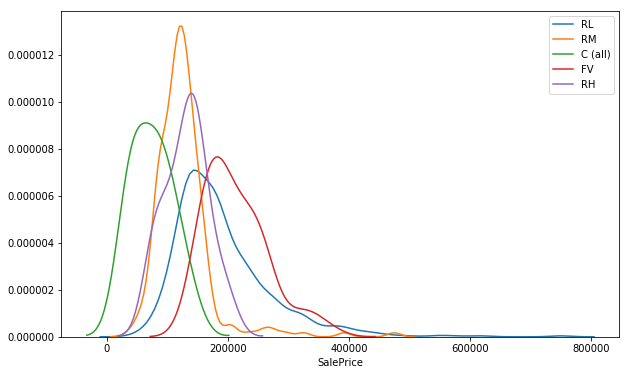

In [18]:
plt.figure(figsize=(10, 6))
for zone in list(df.MSZoning.unique()):
    sns.distplot(df[df.MSZoning==zone].SalePrice, label=zone, hist=False)
plt.show()

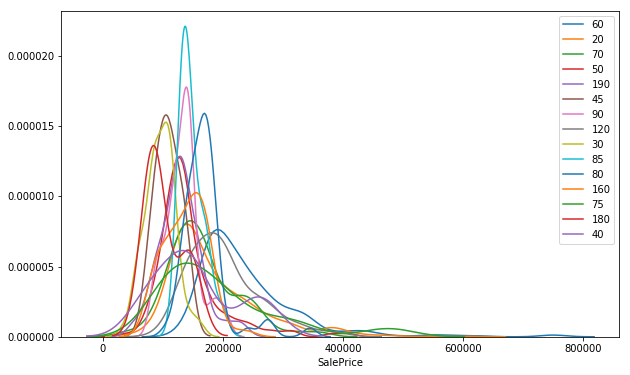

In [19]:
plt.figure(figsize=(10, 6))
for ms_sub_class in list(df.MSSubClass.unique()):
    sns.distplot(df[df.MSSubClass==ms_sub_class].SalePrice, label=ms_sub_class, hist=False)
plt.show()


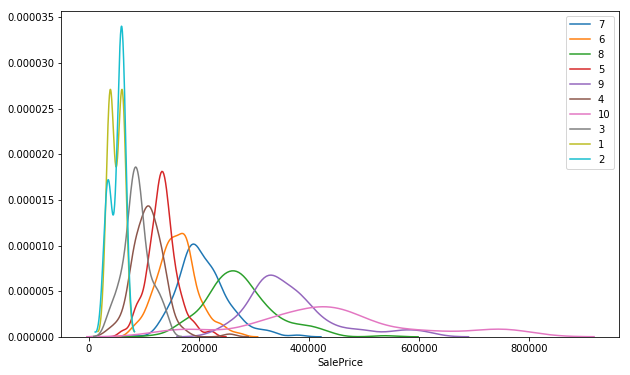

In [20]:
plt.figure(figsize=(10, 6))
for qual in list(df.OverallQual.unique()):
    sns.distplot(df[df.OverallQual==qual].SalePrice, label=qual, hist=False)
plt.show()

In [21]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## Correlations

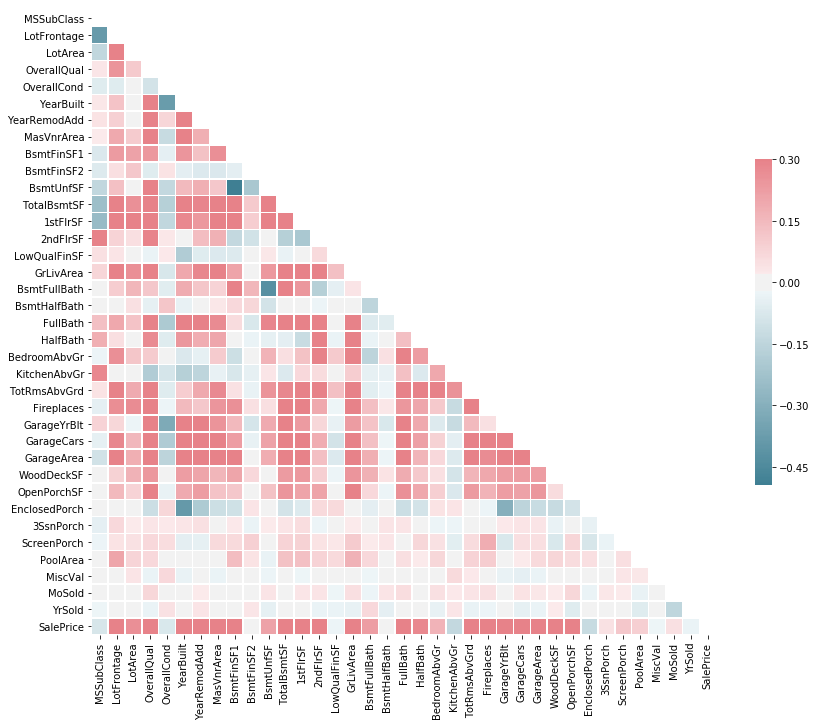

In [22]:
corr = df.corr()
corr

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}) #annot=True

Top 50% Corralation train attributes with sale-price

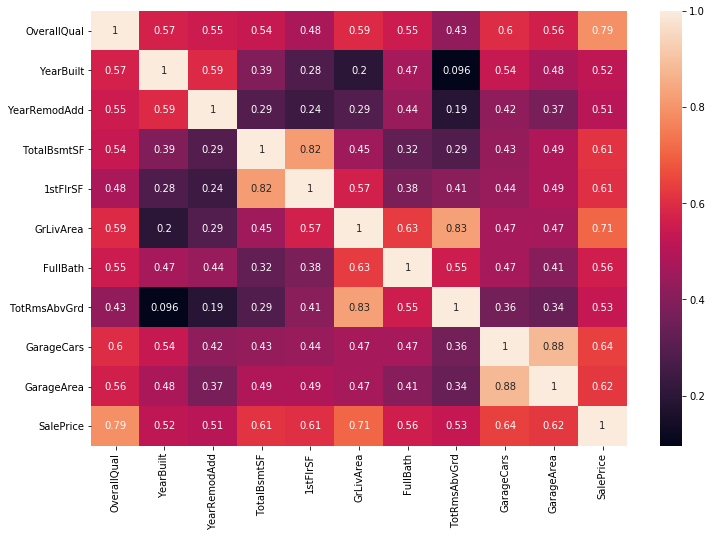

In [23]:
top_feature = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(12, 8))
top_corr = df[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

OverallQual is highly correlated with target feature of saleprice by near 80%

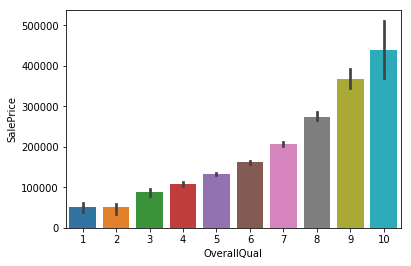

In [24]:
sns.barplot(df.OverallQual, df.SalePrice)

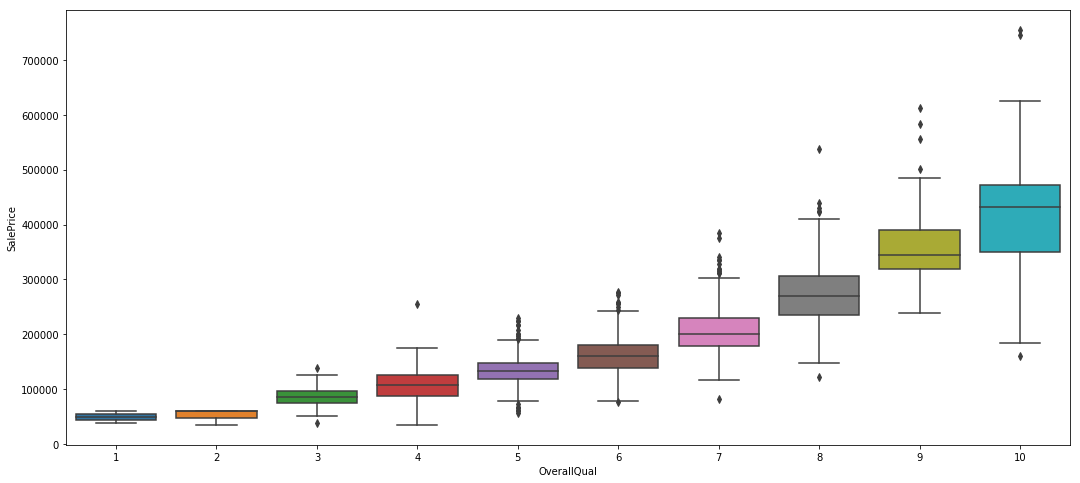

In [25]:
plt.figure(figsize=(18, 8))
sns.boxplot(x=df.OverallQual, y=df.SalePrice)

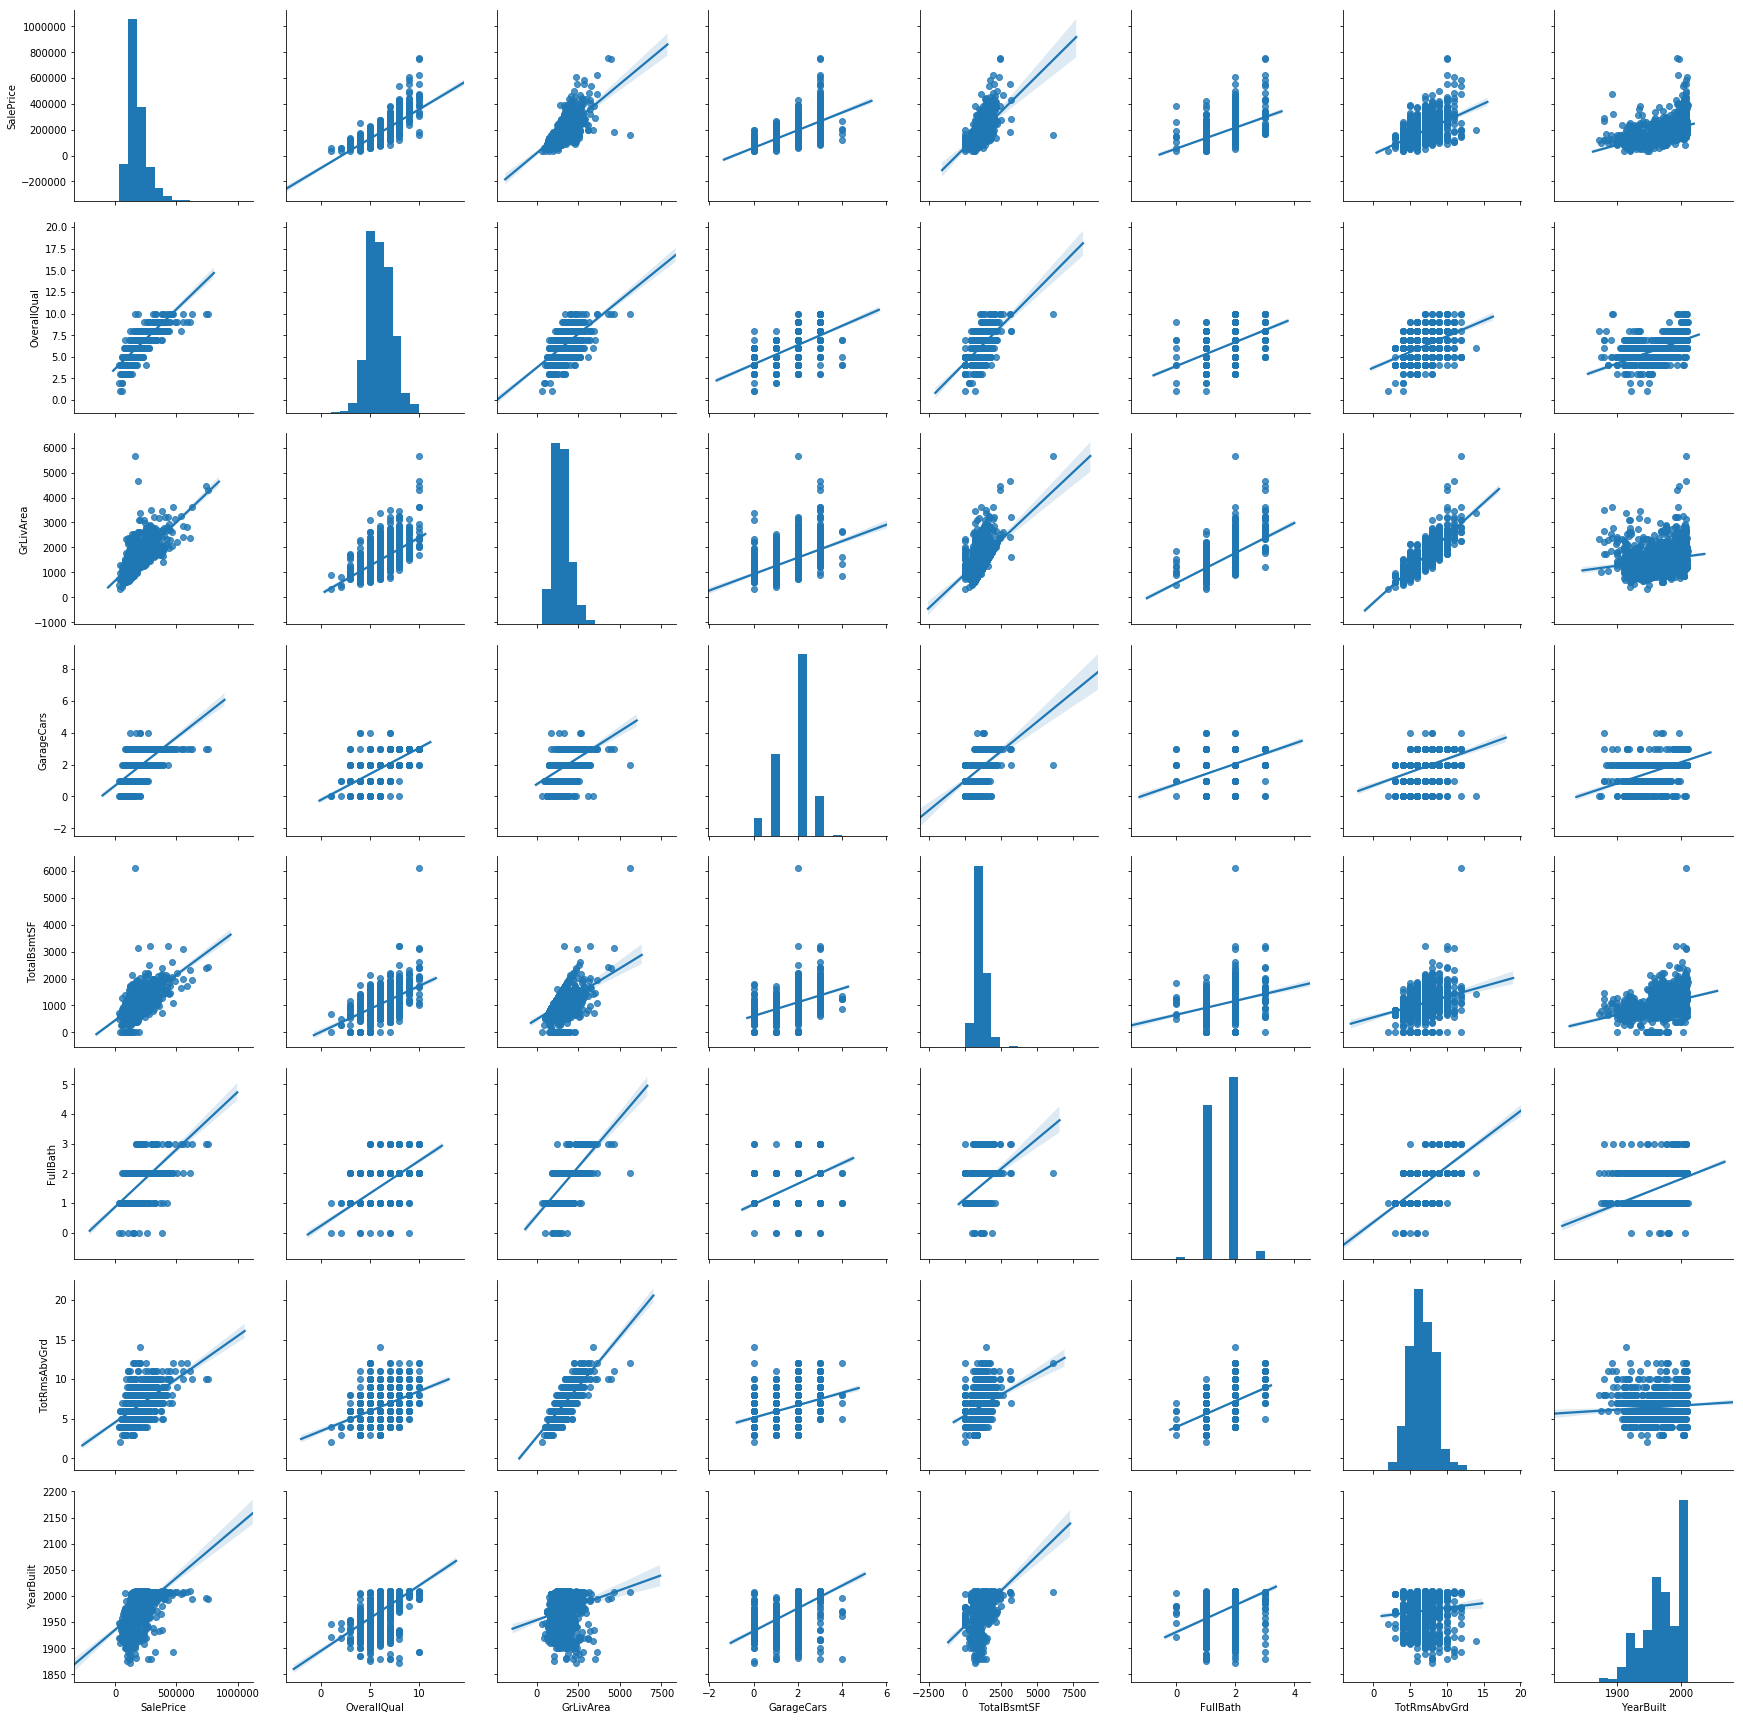

In [26]:
col = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.pairplot(df[col], height=3, kind='reg')

In [27]:
print("Most postively correlated features with the target")
corr = df.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
corr.SalePrice

Most postively correlated features with the target


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

---

# Data preparation & feature engineering

## Dealing with abnormal values

Not relevant here, we can assume that all values are been well integrated.

## Data cleaning & Label encoding of categorical features

No duplicated rows

In [28]:
df.duplicated().sum()

0

Let's remove columns with a high ratio of missing values

We don't have much samples, so instead of removing rows with nan, missing values are then replaced by the median

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
def prepare_data(dataframe):

    dataframe = dataframe.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'])

    cat_feat = list(dataframe.select_dtypes('object').columns)
    num_feat = list(dataframe.select_dtypes(exclude='object').columns)

    dataframe[num_feat] = dataframe[num_feat].fillna(dataframe[num_feat].median())
    dataframe[cat_feat] = dataframe[cat_feat].fillna("Not communicated")
    
    for c in cat_feat:
        lbl = LabelEncoder() 
        lbl.fit(list(dataframe[c].values)) 
        dataframe[c] = lbl.transform(list(dataframe[c].values))
    
    return dataframe

At first sight, there isn't any value in the wrong type / format

Those features can't be used as they are (in string format), this is why we need to convert them in a numerical way...

In [31]:
df = prepare_data(df)

## Creation of new features

* In this case, it's complicated to add features from an other dataset because no information is provided with the CSV file we're using.
* All columns except the id (used as index) seems to be relevant, so all of them are kept at first.
* We can also combine features to create new ones - but in this case it doesn't seem to be really usefull.

## Standardization / normalization

Not needed here

In [32]:
#df[num_feat] = MinMaxScaler().fit_transform(df[num_feat])

## Feature selection  & and data preparation for models

In [33]:
y = df['SalePrice']
X = df.drop(columns=['SalePrice'])
X.shape, y.shape

((1460, 74), (1460,))

Let's split the data into a train and a test set

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 74), (292, 74), (1168,), (292,))

## Feature importance

Top 10 most important features:

In [35]:
rnd_reg = RandomForestRegressor(n_estimators=500, n_jobs=-1)
rnd_reg.fit(X, y)

feature_importances = pd.DataFrame(rnd_reg.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [36]:
feature_importances[:10]

,importance
OverallQual,0.578202
GrLivArea,0.109874
TotalBsmtSF,0.039231
2ndFlrSF,0.035708
BsmtFinSF1,0.029386
1stFlrSF,0.022536
GarageCars,0.020744
GarageArea,0.015562
LotArea,0.013600
YearBuilt,0.009355


Graph with features sorted by importance

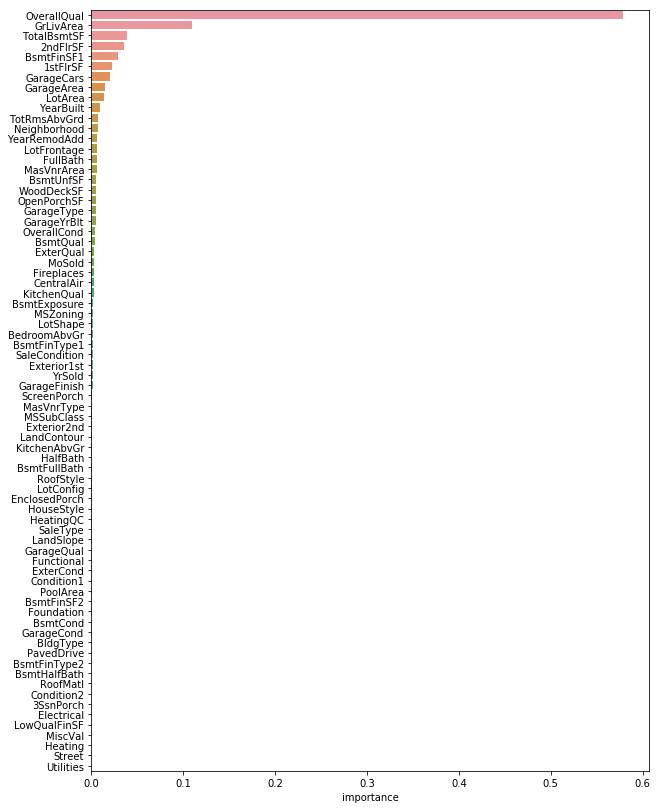

In [37]:
plt.figure(figsize=(10, 14))
sns.barplot(x="importance", y=feature_importances.index, data=feature_importances)
plt.show()

---

# Training models and results

## Baselines - first selection of models

In [38]:
# f1_score binary by default
def get_rmse(reg, model_name):
    """Print the score for the model passed in argument and retrun scores for the train/test sets"""
    
    y_train_pred, y_pred = reg.predict(X_train), reg.predict(X_test)
    rmse_train, rmse_test = np.sqrt(mean_squared_error(y_train, y_train_pred)), np.sqrt(mean_squared_error(y_test, y_pred))
    print(model_name, f'\t - RMSE on Training  = {rmse_train:.0f} / RMSE on Test = {rmse_test:.0f}')
    
    return rmse_train, rmse_test

In [39]:
model_list = [
    LinearRegression(), Lasso(), SVR(),
    RandomForestRegressor(), GradientBoostingRegressor(), Ridge(), ElasticNet(), LinearSVC(),
    BayesianRidge(), ExtraTreesRegressor()
             ]

In [40]:
model_names = [str(m)[:str(m).index('(')] for m in model_list]
rmse_train, rmse_test = [], []

In [41]:
model_names

['LinearRegression',
 'Lasso',
 'SVR',
 'RandomForestRegressor',
 'GradientBoostingRegressor',
 'Ridge',
 'ElasticNet',
 'LinearSVC',
 'BayesianRidge',
 'ExtraTreesRegressor']

In [42]:
for model, name in zip(model_list, model_names):
    model.fit(X_train, y_train)
    sc_train, sc_test = get_rmse(model, name)
    rmse_train.append(sc_train)
    rmse_test.append(sc_test)

LinearRegression 	 - RMSE on Training  = 31163 / RMSE on Test = 32162
Lasso 	 - RMSE on Training  = 31163 / RMSE on Test = 32158
SVR 	 - RMSE on Training  = 79338 / RMSE on Test = 90251
RandomForestRegressor 	 - RMSE on Training  = 14748 / RMSE on Test = 30100
GradientBoostingRegressor 	 - RMSE on Training  = 13689 / RMSE on Test = 26783
Ridge 	 - RMSE on Training  = 31176 / RMSE on Test = 32091
ElasticNet 	 - RMSE on Training  = 32547 / RMSE on Test = 33122
LinearSVC 	 - RMSE on Training  = 94350 / RMSE on Test = 105986
BayesianRidge 	 - RMSE on Training  = 31599 / RMSE on Test = 31864
ExtraTreesRegressor 	 - RMSE on Training  = 0 / RMSE on Test = 30023


Results comparison chart

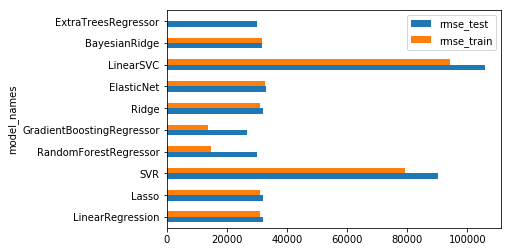

In [43]:
df_score = pd.DataFrame({'model_names' : model_names,
                         'rmse_train' : rmse_train,
                         'rmse_test' : rmse_test})
ax = df_score.plot.barh(y=['rmse_test', 'rmse_train'], x='model_names')

The LinearSVC model isn't performing well because data haven't been scaled before, let's do it with a pipeline:

In [44]:
svm_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_regresssor", LinearSVC())
])
svm_reg.fit(X_train, y_train)
_, _ = get_rmse(svm_reg, "svr_rbf")

svr_rbf 	 - RMSE on Training  = 2158 / RMSE on Test = 70136


That's much better, although it seems the linear kernel is the best option here: 

In [45]:
svr_rbf = SVR(kernel = 'rbf')
svr_rbf.fit(X_train, y_train)
_, _ = get_rmse(svr_rbf, "svr_rbf")

svr_rbf 	 - RMSE on Training  = 79338 / RMSE on Test = 90251


In [46]:
svm_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_regresssor", SVR())
])
svm_reg.fit(X_train, y_train)
_, _ = get_rmse(svm_reg, "svr_rbf")

svm_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_regresssor", SVR(kernel="poly"))
])
svm_reg.fit(X_train, y_train)
_, _ = get_rmse(svm_reg, "svr_poly")

sgd_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("sgd_regresssor", SGDRegressor())
])
sgd_reg.fit(X_train, y_train)
_, _ = get_rmse(sgd_reg, "sgd_reg") 

svr_rbf 	 - RMSE on Training  = 79310 / RMSE on Test = 90222
svr_poly 	 - RMSE on Training  = 79315 / RMSE on Test = 90224
sgd_reg 	 - RMSE on Training  = 31546 / RMSE on Test = 34055


The same remark comes true also for the SGD Regressor model

Let's try XGBoost !

In [47]:
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
_, _ = get_rmse(xgb_reg, "xgb_reg")

xgb_reg 	 - RMSE on Training  = 14601 / RMSE on Test = 27209


Looks promissing, here we can conclude that RandomForestRegressor, GradientBoostingRegressor and XGBoost seems to be the models we'll keep for hyperparameters tuning !

## Model optimisation

### RandomForrestReg

In [48]:
from sklearn.model_selection import GridSearchCV


rf = RandomForestRegressor()
param_grid = { 
    'n_estimators': [80, 100, 120],
    'max_features': [14, 15, 16, 17],
    'max_depth' : [14, 16, 18]
}


rfc_cv = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
rfc_cv.fit(X_train, y_train)
print(rfc_cv.best_params_)
_, _ = get_rmse(rfc_cv, "rfc_reg")

{'max_depth': 18, 'max_features': 17, 'n_estimators': 100}
rfc_reg 	 - RMSE on Training  = 11404 / RMSE on Test = 29079


### GradientBoostingReg

In [49]:
gb = GradientBoostingRegressor()
param_grid = { 
    'n_estimators': [100, 400],
    'max_features': [14, 15, 16, 17],
    'max_depth' : [1, 2, 8, 14, 18]
}


gb_cv = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, n_jobs=-1)
gb_cv.fit(X_train, y_train)
print(gb_cv.best_params_)
_, _ = get_rmse(gb_cv, "gb_cv")

{'max_depth': 8, 'max_features': 15, 'n_estimators': 100}
gb_cv 	 - RMSE on Training  = 1180 / RMSE on Test = 25624


### XGBoostReg

In [50]:
xg = xgb.XGBRegressor()
param_grid = { 
    'n_estimators': [100, 400],
    'max_features': [10, 14, 16],
    'max_depth' : [1, 2, 8, 18]
}


xg_cv = GridSearchCV(estimator=xg, param_grid=param_grid, cv=5, n_jobs=-1)
xg_cv.fit(X_train, y_train)
print(xg_cv.best_params_)
_, _ = get_rmse(xg_cv, "xg_cv")

{'max_depth': 8, 'max_features': 10, 'n_estimators': 100}
xg_cv 	 - RMSE on Training  = 2478 / RMSE on Test = 28332


## Combination of the best models & submission

In [51]:
df_test = pd.read_csv('../input/test.csv', index_col='Id' )
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [52]:
df_test = prepare_data(df_test)
df_test.shape

(1459, 74)

In [53]:
rfc_sub, gb_sub, xg_sub = rfc_cv.predict(df_test), gb_cv.predict(df_test), xg_cv.predict(df_test)

In [54]:
sub = pd.DataFrame()
sub['Id'] = df_test.index
sub['SalePrice'] = np.mean([rfc_sub, gb_sub, xg_sub], axis=0) / 3
sub.to_csv('submission.csv',index=False)

If you found this notebook helpful or you just liked it , some upvotes would be very much appreciated - That will keep me motivated to update it on a regular basis :-)